# Simulating Reinforcement Learning in Motor Adaptation

This notebook implements a simplified version of the model from Therrien et al. (2016) to simulate reinforcement learning in a reaching task. We explore how exploration variability (σₑ) and motor noise (σₘ) affect learning — and how this might explain results from Holland et al. (2018), where some learners succeed and others fail depending on their ability to exploit exploration.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

## Task
Find the appropriate parameters for the two groups of subjects (failers and learners) to reproduce the results in Holland 2018, Figure 2B. 

In [ ]:
)# Parameters for "successful learners" 
sigma_e_success_initial = 5.0
sigma_m_success = 5.0

# Parameters for "failed learners" 
sigma_e_fail_initial = 5.0
sigma_m_fail = 5.0

exploration_factor = 1.0
exploitation_factor = 1.0

n_subjects = 20

In [ ]:
# Define simulation function with gradually increasing target
def simulate_learning(sigma_e_initial, sigma_m, n_trials=120, max_target_angle=20.0):
    reach_angles = np.zeros(n_trials)
    x = 0.0  # initial internal estimate

    # Define gradual target angle ramp
    target_angle = np.linspace(0, max_target_angle, n_trials)

    # Initialize exploration noise
    sigma_e = sigma_e_initial

    for t in range(n_trials):
        et = np.random.normal(0, sigma_e)
        mt = np.random.normal(0, sigma_m)
        y = x + et + mt  # observed reach
        reach_angles[t] = y

        # Reward-based update
        if abs(y - target_angle[t]) < reward_threshold:
            x = x + et  # update estimate by exploration component only
            # OPTIONAL: reduce exploration noise on success (exploitation)
            sigma_e = max(0.5, sigma_e * exploitation_factor)  # example decay
        else:
            # OPTIONAL: increase exploration noise on failure (exploration)
            sigma_e = min(5.0, sigma_e * exploration_factor)  # example increase

    return reach_angles


In [ ]:
# Define model parameters
n_trials = 120
max_target_angle = 20.0  # Gradually increase from 0 to 20 degrees
reward_threshold = 5.0   # Reward window (±5 degrees

# Simulate "successful" learners
success_group = np.zeros((n_subjects, n_trials))
for subj in range(n_subjects):
    success_group[subj, :] = simulate_learning(sigma_e_success_initial, sigma_m_success, n_trials, max_target_angle)

# Simulate "failed" learners
fail_group = np.zeros((n_subjects, n_trials))
for subj in range(n_subjects):
    fail_group[subj, :] = simulate_learning(sigma_e_fail_initial, sigma_m_fail, n_trials, max_target_angle)

In [38]:
# Compute group means and standard errors
mean_success = np.mean(success_group, axis=0)
sem_success = np.std(success_group, axis=0) / np.sqrt(n_subjects)

mean_fail = np.mean(fail_group, axis=0)
sem_fail = np.std(fail_group, axis=0) / np.sqrt(n_subjects)

# Compute target angle trajectory
target_angle = np.linspace(0, max_target_angle, n_trials)

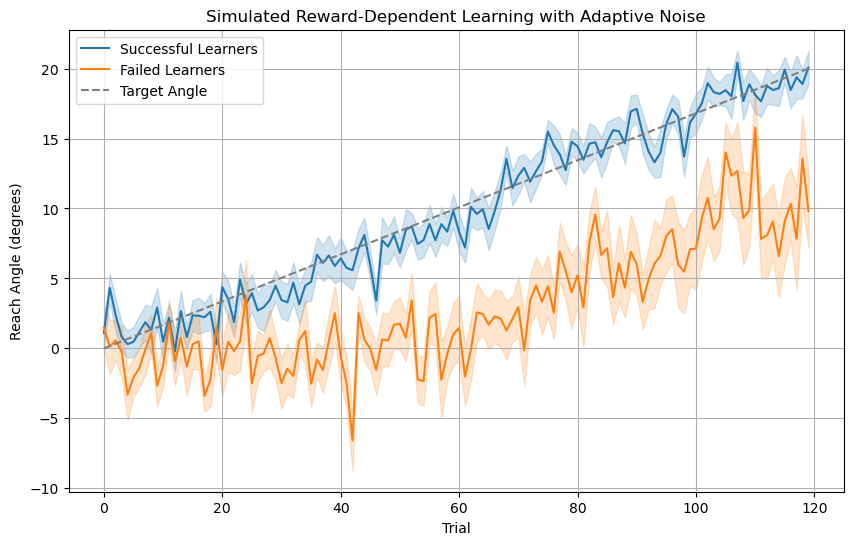

In [39]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_success, color='tab:blue', label='Successful Learners')
plt.fill_between(range(n_trials), mean_success - sem_success, mean_success + sem_success, color='tab:blue', alpha=0.2)

plt.plot(mean_fail, color='tab:orange', label='Failed Learners')
plt.fill_between(range(n_trials), mean_fail - sem_fail, mean_fail + sem_fail, color='tab:orange', alpha=0.2)

plt.plot(target_angle, linestyle='--', color='gray', label='Target Angle')
plt.xlabel('Trial')
plt.ylabel('Reach Angle (degrees)')
plt.title('Simulated Reward-Dependent Learning with Adaptive Noise')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
final_angles_success = success_group[:, -10:].mean(axis=1)
final_angles_fail = fail_group[:, -10:].mean(axis=1)

plt.bar(['Successful Learners', 'Failed Learners'],
        [np.mean(final_angles_success), np.mean(final_angles_fail)],
        yerr=[np.std(final_angles_success), np.std(final_angles_fail)],
        color=['tab:blue', 'tab:orange'], alpha=0.7)
plt.axhline(y=max_target_angle, linestyle='--', color='gray', label='Target Angle')
plt.ylabel('Final Mean Reach Angle (degrees)')
plt.title('Final Performance by Group')
plt.legend()
plt.grid(True)
plt.show()